In [163]:
import numpy as np
import torch
import torch.nn as nn
import scipy
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [164]:
class ViscousBurgersEquation:
    def __init__(self, v, L, N, u_initial):
        self.v, self.L, self.N = v, L, N
        self.dx = L / (N - 1)
        self.x = np.linspace(0, L, N)
        self.u_initial = u_initial(self.x)  # Initial condition (array of velocity at each grid point)

    def model(self, u, t):
        dudt = np.zeros_like(u)
        # Central difference in space, forward difference in time!
        for i in range(1, self.N-1):
            dudt[i] = (self.v / self.dx**2) * (u[i+1] - 2*u[i] + u[i-1]) - u[i] * (u[i] - u[i-1]) / self.dx
        # Dirichlet boundary conditions
        dudt[0] = dudt[-1] = 0.0
        return dudt

    def solve(self, t):
        u = odeint(self.model, self.u_initial, t)
        return u

In [165]:
v = 1 / (100 * np.pi)
L = 2
Np_phys = 10**3
u_initial = lambda x: -np.sin(np.pi * x)

VB = ViscousBurgersEquation(v, L, Np_phys, u_initial)

In [166]:
t_phys = np.linspace(0, 1, Np_phys)

sol_phys = VB.solve(t_phys)

print(sol_phys)

[[-0.00000000e+00 -6.28943332e-03 -1.25786178e-02 ...  1.25786178e-02
   6.28943332e-03  2.44929360e-16]
 [ 0.00000000e+00 -6.30907493e-03 -1.26178984e-02 ...  1.26178947e-02
   6.30907355e-03  2.44929360e-16]
 [ 0.00000000e+00 -6.32883891e-03 -1.26574228e-02 ...  1.26574146e-02
   6.32883496e-03  2.44929360e-16]
 ...
 [-5.99586268e-23 -2.01509958e-01 -3.77099820e-01 ...  2.79081968e-01
   1.45768299e-01  2.44929360e-16]
 [-5.99127843e-23 -2.01207459e-01 -3.76572203e-01 ...  2.78742840e-01
   1.45583733e-01  2.44929360e-16]
 [-5.99013211e-23 -2.00905564e-01 -3.76045525e-01 ...  2.78404227e-01
   1.45399465e-01  2.44929360e-16]]


In [167]:
data_min = np.min(sol_phys)
data_min_arg = np.argmin(sol_phys)
data_max = np.max(sol_phys)
data_max_arg = np.argmax(sol_phys)
print(f"Data min: {data_min} at {data_min_arg}, Data max: {data_max} at {data_max_arg}")

Data min: -0.9999987638285974 at 250, Data max: 0.9999987638285974 at 749


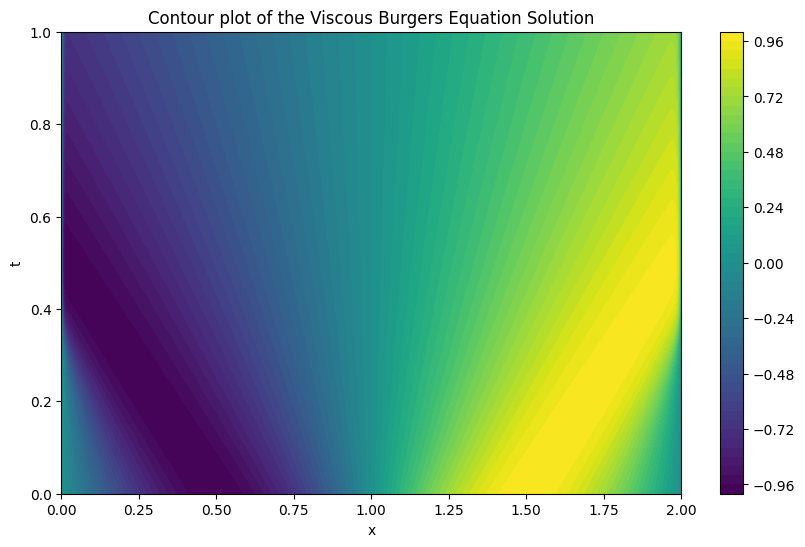

In [168]:
X, T = np.meshgrid(VB.x, t_phys)

if np.any(np.isinf(sol_phys)):
    raise Exception("Data contains Infs, which cannot be plotted.")

# Contour plot
plt.figure(figsize=(10, 6))
norm = Normalize(vmin=data_min, vmax=data_max)
contour = plt.contourf(X, T, sol_phys, 50, cmap='viridis', norm=norm)

plt.colorbar(contour)

plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of the Viscous Burgers Equation Solution')

plt.show()